In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv("USA_Housing.csv")

In [103]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [104]:
df.shape

(5000, 7)

In [105]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


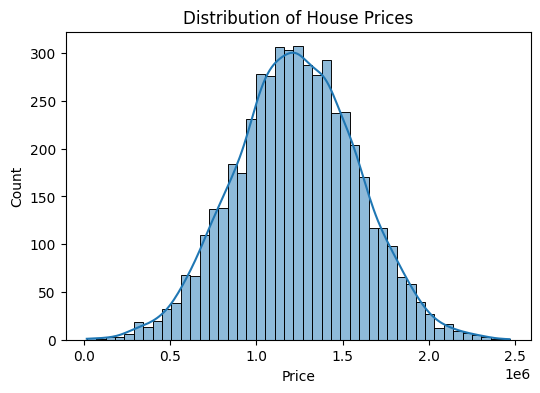

In [108]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()


In [109]:
df.drop('Address', axis=1, inplace=True)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [111]:
# df.drop('Address_Length', axis=1, inplace=True)

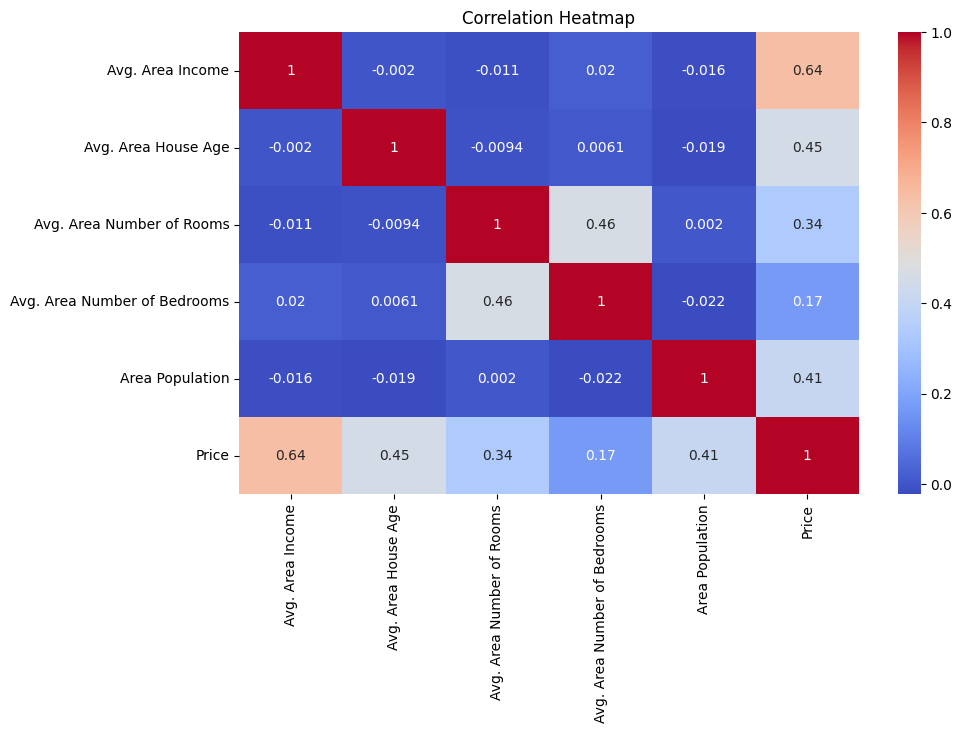

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


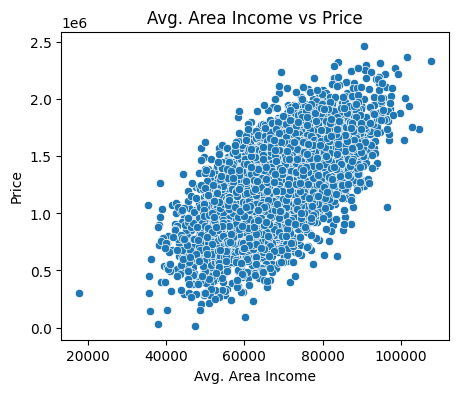

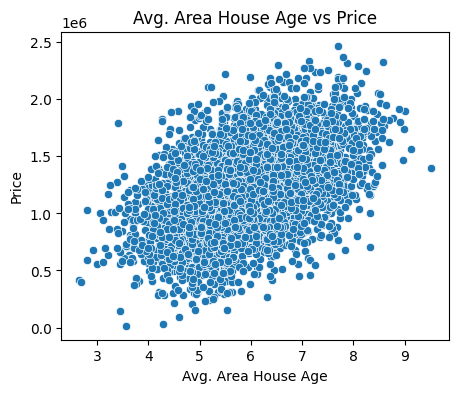

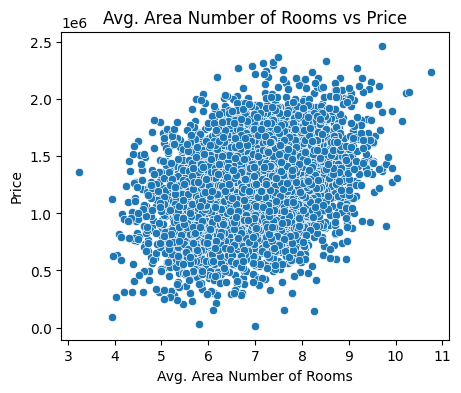

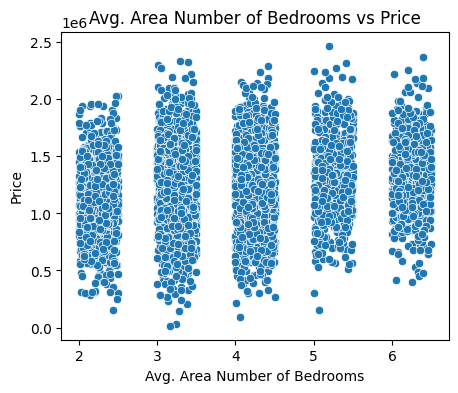

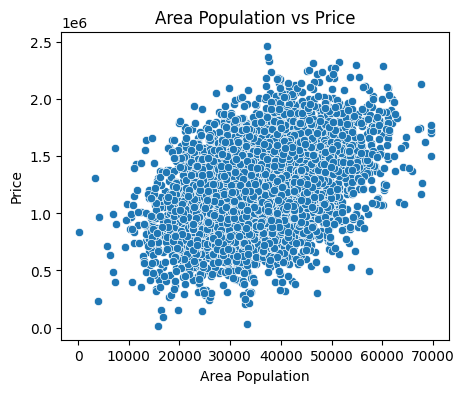

In [113]:
features = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population'
]

for col in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f"{col} vs Price")
    plt.show()


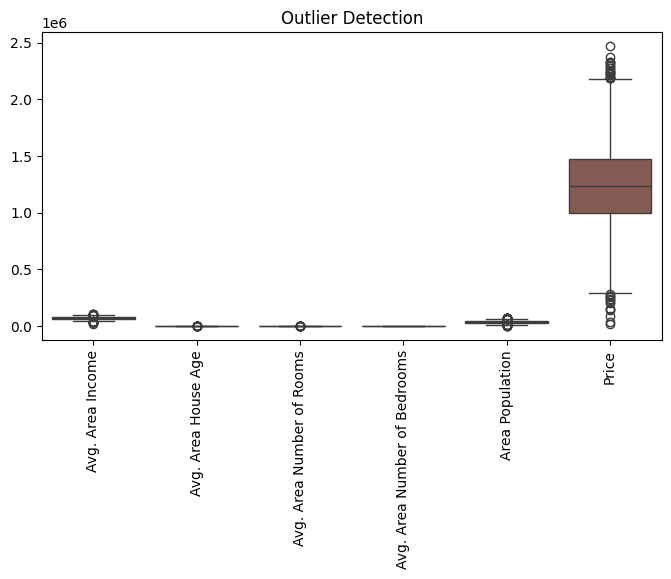

In [114]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()


In [115]:
X = df.drop('Price', axis=1)
y = df['Price']


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [118]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [119]:
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }


In [120]:
models = [
    evaluate_model("Linear Regression", LinearRegression()),
    evaluate_model("Random Forest", RandomForestRegressor(n_estimators=80,
    max_depth=10,random_state=42)),

]

results_df = pd.DataFrame(models)
print(results_df.sort_values(by="R2", ascending=False))


               Model           MAE           RMSE        R2
0  Linear Regression  80879.097235  100444.060556  0.917997
1      Random Forest  94621.943454  120574.519661  0.881834


In [121]:
import joblib

In [122]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

joblib.dump(best_model, "best_housing_model.pkl")


['best_housing_model.pkl']